## Test dfba functions
there are three cases
- case1: cobra.test.create_test_model
- case2: iML1515
- case3: one of Halo EC models (random)

In [1]:
import sys

import numpy as np

sys.path.insert(0, '/Users/lhao/Documents/Git/py_Halo-GEM/ecpy')
from curate_kcat_light_goslim_asc_step2 import *
import dfba_functions
import cobra

import warnings
import pickle
warnings.filterwarnings('ignore')
import pandas as pd

def test_growth(model):
    model.objective = 'Biomass_v1'
    model.objective_direction = 'max'
    s = model.optimize()
    r = s.objective_value if s.status == 'optimal' else -1
    print('Results:')
    print('  Status        :', s.status)
    print('  growth_rate   :', r)
    print('  glucose uptake:', s.fluxes['Exchange_Glucopyranose'])
    print('  PHA           :', s.fluxes['PHA_secretion'])
    print('  NGAM lb:', model.reactions.NGAM.lower_bound)
    print('  PHA lb:', model.reactions.PHA_secretion.lower_bound)

    print()


### Case1:
test three method:
- dfba_functions.do_dfba_iteration: only FBA based
- dfba_functions.do_dfba_solve_ivp: FBA and ODE
- dfba_functions.do_dfba_odeint: FBA and ODE

In [2]:
from cobra.test import create_test_model

model = create_test_model('textbook')
biomass_id = 'Biomass_Ecoli_core'

d_model = dfba_functions.dfba_model('test_model')
d_model.cobra_model = model.copy()
d_model.tspan = np.linspace(0, 10, 101)
d_model.products_rxns = [biomass_id, 'EX_co2_e', 'EX_ac_e', 'EX_pyr_e']
# d_model.initial_products = [0.1, 0]
d_model.substrate_rxns = ['EX_glc__D_e']
# d_model.initial_substrate = [10]
d_model.opt_list = [biomass_id, 'EX_co2_e', 'EX_ac_e', 'EX_pyr_e', 'EX_glc__D_e']
d_model.y0 = [0.1, 0, 0, 0, 10]
d_model.opt_list_direction = ['max', ] * len(d_model.opt_list)
d_model.opt_list_multiply_by = np.array([1] * len(d_model.opt_list))
d_model.options = 'add_lp_feasibility'  # if add_lp_feasibility(default) will be slow
d_model.bound_method = 'actual_substrate_uptake'  # 'basic_Michaelis_Menten'
d_model.growth_tol = 1E-6

Using license file /Users/lhao/gurobi.lic
Academic license - for non-commercial use only
Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmpk8b8oye5.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros


Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmp27hbdkum.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros

---------- Dynamic Flux Balance Analysis (dFBA) iteration ... ---------- 
original_bounds: [-10.]


t = 2.400: : 25it [00:00, 144.38it/s]


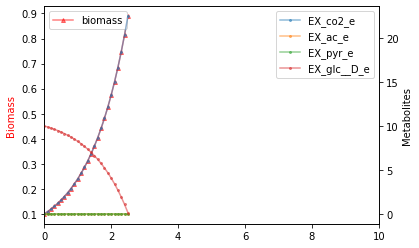

In [3]:
d_model.cobra_model = model.copy()
sol_iteration = dfba_functions.do_dfba_iteration(d_model)
dfba_functions.draw(sol_iteration, d_model)

Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmppheq_ue7.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros

---------- Dynamic Flux Balance Analysis (dFBA) solve_ivp ... ---------- 
original_bounds: [-10.]


t = 4.538: : 106it [00:13,  7.75it/s]


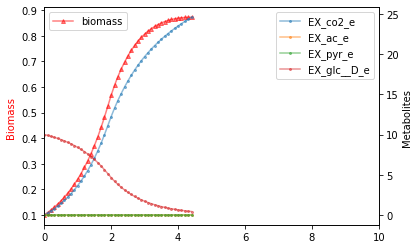

In [4]:
d_model.cobra_model = model.copy()
sol_solve_ivp = dfba_functions.do_dfba_solve_ivp(d_model, bool_tqdm=True, terminal=True)
dfba_functions.draw(sol_solve_ivp, d_model)

Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmpctt99mhe.lp
Reading time = 0.00 seconds
: 72 rows, 190 columns, 720 nonzeros

---------- Dynamic Flux Balance Analysis (dFBA) odeint ... ---------- 
original_bounds: [-10.]


t = 10.124: : 329it [00:31, 10.46it/s]


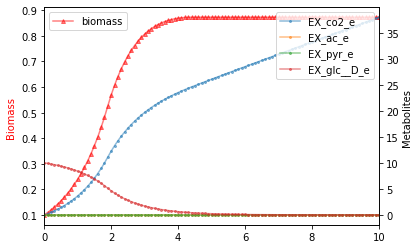

In [5]:
d_model.cobra_model = model.copy()
sol_odeint = dfba_functions.do_dfba_odeint(d_model, bool_tqdm=True, )
dfba_functions.draw(sol_odeint, d_model)

### Case2:
test three method:

In [6]:
model = cobra.io.read_sbml_model('../../../ComplementaryData/iML1515.xml')
biomass_id = 'BIOMASS_Ec_iML1515_core_75p37M'

d_model = dfba_functions.dfba_model('test_model')
d_model.cobra_model = model.copy()
d_model.tspan = np.linspace(0, 10, 101)
d_model.products_rxns = [biomass_id, 'EX_co2_e', 'EX_ac_e', 'EX_pyr_e']
# d_model.initial_products = [0.1, 0]
d_model.substrate_rxns = ['EX_glc__D_e']
# d_model.initial_substrate = [10]
d_model.opt_list = [biomass_id, 'EX_co2_e', 'EX_ac_e', 'EX_pyr_e', 'EX_glc__D_e']
d_model.y0 = [0.1, 0, 0, 0, 10]
d_model.opt_list_direction = ['max', ] * len(d_model.opt_list)
d_model.opt_list_multiply_by = np.array([1] * len(d_model.opt_list))
d_model.options = 'not_add_lp_feasibility'  # if add_lp_feasibility(default) will be slow
d_model.bound_method = 'actual_substrate_uptake'  # 'basic_Michaelis_Menten'
d_model.growth_tol = 1E-6

Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmpkafnev1i.lp
Reading time = 0.02 seconds
: 1877 rows, 5424 columns, 21150 nonzeros


Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmpnvnl2oq5.lp
Reading time = 0.02 seconds
: 1877 rows, 5424 columns, 21150 nonzeros

---------- Dynamic Flux Balance Analysis (dFBA) iteration ... ---------- 
original_bounds: [-10.]


t = 2.400: : 25it [00:02,  8.88it/s]


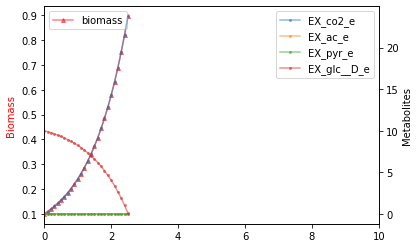

In [7]:
d_model.cobra_model = model.copy()
sol_iteration = dfba_functions.do_dfba_iteration(d_model)
dfba_functions.draw(sol_iteration, d_model)

Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmpr_tdafby.lp
Reading time = 0.02 seconds
: 1877 rows, 5424 columns, 21150 nonzeros

---------- Dynamic Flux Balance Analysis (dFBA) solve_ivp ... ---------- 
original_bounds: [-10.]


t = 4.888: : 154it [00:17,  8.84it/s]


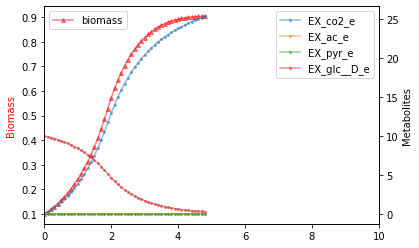

In [8]:
d_model.cobra_model = model.copy()
sol_solve_ivp = dfba_functions.do_dfba_solve_ivp(d_model, bool_tqdm=True, terminal=True)
dfba_functions.draw(sol_solve_ivp, d_model)

Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmpngtj7udc.lp
Reading time = 0.02 seconds
: 1877 rows, 5424 columns, 21150 nonzeros

---------- Dynamic Flux Balance Analysis (dFBA) odeint ... ---------- 
original_bounds: [-10.]


t = 13.298: : 363it [00:41,  8.78it/s]


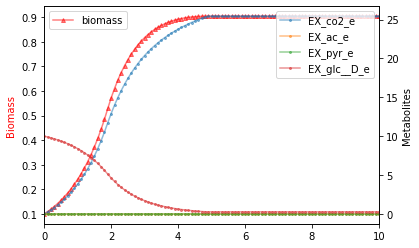

In [9]:
d_model.cobra_model = model.copy()
sol_odeint = dfba_functions.do_dfba_odeint(d_model, bool_tqdm=True, )
dfba_functions.draw(sol_odeint, d_model)

### Case3:
test three method:

Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmprg8wfxv7.lp
Reading time = 0.04 seconds
: 3871 rows, 9656 columns, 39458 nonzeros
Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmpdpnxgp84.lp
Reading time = 0.03 seconds
: 3871 rows, 9656 columns, 39458 nonzeros
Results:
  Status        : optimal
  growth_rate   : 0.1419544193112764
  glucose uptake: 0.3187755112667891
  PHA           : 0.0
  NGAM lb: 6.86
  PHA lb: 0.0



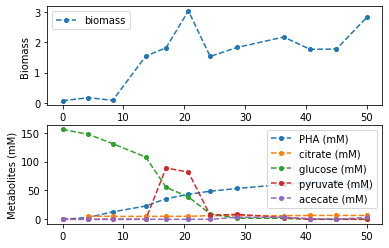

In [18]:
posterior = pickle.load(open('../Results/smc_abc_light_go_and_one_asc_step_2.pkl','rb'))


tmp_model_file = '../Results/template_ecModel_goslim_pools.pkl'
tmp_model = pickle.load(open(tmp_model_file,'rb'))

dffrac = pd.read_csv('../Results/protein_abundance_go_slim_level_uniq_asc.csv',index_col=0)
dftot = pd.read_csv('../proteomics/total_protein_abandance_mean.csv',index_col=0)
dfpheno = pd.read_csv('../proteomics/phynotype.csv',index_col=0,comment='#')

_,pools = buildPoolDict(dffrac,'NACL60',dftot.loc['NACL60','Ptot'],sigma=0.5)


random_index = np.random.randint(100)
kcat_dct = posterior.population[random_index]

model = tmp_model.copy()
updateKcats(model,kcat_dct)
updateProteinConstraints(model,pools)

test_growth(model)
df = dfba_functions.get_batch_experiment_data()
# cobra.io.save_json_model(model,'test_dfba_model.json')

In [11]:
biomass_id = 'Biomass_v1'
glc_id = 'Exchange_Glucopyranose'

d_model = dfba_functions.dfba_model('test_model')
d_model.tspan = np.linspace(0, 50, 101)
d_model.cobra_model = model.copy()

d_model.products_rxns = [biomass_id, 'PHA_secretion',
                         'Exchange_ACET']  # 'PHA_secretion', 'Exchange_ACET', 'Exchange_PYRUVATE',
d_model.substrate_rxns = [glc_id]
d_model.substrate_bounds = ['upper_bound']
d_model.opt_list = d_model.products_rxns + d_model.substrate_rxns  # [biomass_id, 'EX_co2_e', 'EX_ac_e', 'EX_pyr_e', 'EX_glc__D_e']
d_model.opt_list_direction = ['max', ] * (len(d_model.opt_list) - 1) + ['min']
d_model.opt_list_multiply_by = np.array([1] * (len(d_model.opt_list) - 1) + [-1])
d_model.y0 = [0.07446502] + [0] * (len(d_model.opt_list) - 2) + [28]
d_model.options = 'not_add_lp_feasibility'  # not_add_lp_feasibility
d_model.bound_method = 'actual_substrate_uptake'  # 'basic_Michaelis_Menten'
d_model.growth_tol = 1E-6

Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmp9h60gvtw.lp
Reading time = 0.04 seconds
: 3871 rows, 9656 columns, 39458 nonzeros


Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmpn8p1zrg1.lp
Reading time = 0.04 seconds
: 3871 rows, 9656 columns, 39458 nonzeros

---------- Dynamic Flux Balance Analysis (dFBA) iteration ... ---------- 
original_bounds: [1000.]


t = 26.500: : 54it [00:11,  4.89it/s]


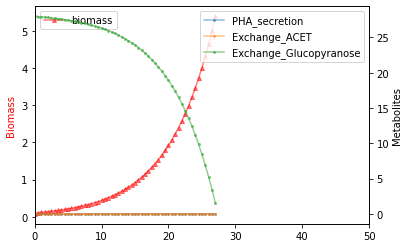

In [12]:
d_model.cobra_model = model.copy()
sol_iteration = dfba_functions.do_dfba_iteration(d_model)
dfba_functions.draw(sol_iteration, d_model)

Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmpulrhmkk7.lp
Reading time = 0.05 seconds
: 3871 rows, 9656 columns, 39458 nonzeros

---------- Dynamic Flux Balance Analysis (dFBA) solve_ivp ... ---------- 
original_bounds: [1000.]


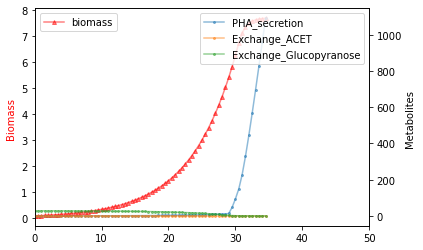

In [13]:
d_model.cobra_model = model.copy()
sol_solve_ivp = dfba_functions.do_dfba_solve_ivp(d_model, bool_tqdm=True, terminal=True)
dfba_functions.draw(sol_solve_ivp, d_model)

Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmp4zfjogrk.lp
Reading time = 0.03 seconds
: 3871 rows, 9656 columns, 39458 nonzeros

---------- Dynamic Flux Balance Analysis (dFBA) odeint ... ---------- 
original_bounds: [1000.]


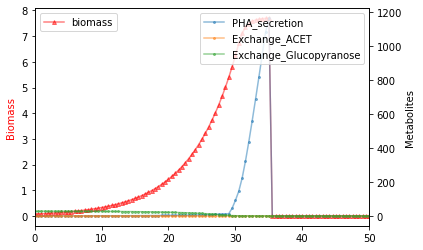

In [14]:
d_model.cobra_model = model.copy()
sol_odeint = dfba_functions.do_dfba_odeint(d_model, bool_tqdm=True, )
dfba_functions.draw(sol_odeint, d_model)


Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmptbnss36k.lp
Reading time = 0.04 seconds
: 3871 rows, 9656 columns, 39458 nonzeros

---------- Dynamic Flux Balance Analysis (dFBA) iteration ... ---------- 
original_bounds: [1000.]


t = 26.500: : 54it [00:11,  4.55it/s]


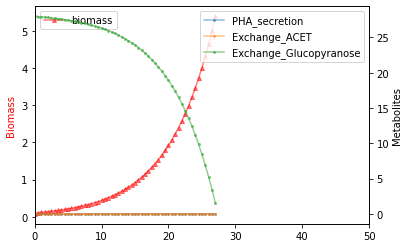

In [15]:
d_model.options = 'only_FBA'  # not_add_lp_feasibility

d_model.cobra_model = model.copy()
sol_iteration = dfba_functions.do_dfba_iteration(d_model)
dfba_functions.draw(sol_iteration, d_model)

Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmp30kos80r.lp
Reading time = 0.04 seconds
: 3871 rows, 9656 columns, 39458 nonzeros

---------- Dynamic Flux Balance Analysis (dFBA) solve_ivp ... ---------- 
original_bounds: [1000.]


t = 46.878: : 186it [00:39,  4.73it/s]


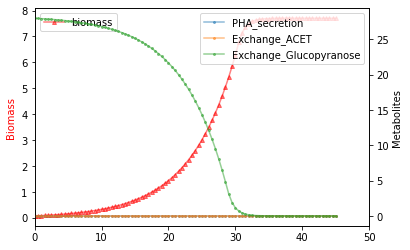

In [16]:
d_model.cobra_model = model.copy()
sol_solve_ivp = dfba_functions.do_dfba_solve_ivp(d_model, bool_tqdm=True, terminal=True)
dfba_functions.draw(sol_solve_ivp, d_model)

Read LP format model from file /var/folders/f_/qxjgggy53kgf53y_ytc_6nt1s_zp5x/T/tmplkqaa8na.lp
Reading time = 0.03 seconds
: 3871 rows, 9656 columns, 39458 nonzeros

---------- Dynamic Flux Balance Analysis (dFBA) odeint ... ---------- 
original_bounds: [1000.]


t = 50.551: : 490it [01:34,  5.20it/s]


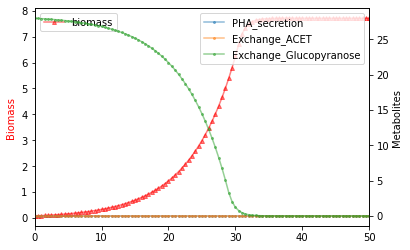

In [17]:
d_model.cobra_model = model.copy()
sol_odeint = dfba_functions.do_dfba_odeint(d_model, bool_tqdm=True, )
dfba_functions.draw(sol_odeint, d_model)